# Selecting the Best 11 from (2008-2020) Indian Premier League Cricket Match Data. 

Loading Modules

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Dataset

Importing the Data from API

In [2]:
url = "https://ipl-api1.p.rapidapi.com/players"

headers = {
	"X-RapidAPI-Key": "84e2f741a8msha9cf34c84ff1245p170ed0jsn5aa9519aa1e2",
	"X-RapidAPI-Host": "ipl-api1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data = response.json()

# Converting the data into a DataFrame
df = pd.DataFrame(data)


# Display the DataFrame
df

,Unnamed: 0,player,runs,boundaries,balls_faced,wickets,balls_bowled,runs_conceded,matches,batting_avg,batting_strike_rate,boundaries_percent,bowling_economy,bowling_avg,bowling_strike_rate,catches,stumpings
0,0,A Ashish Reddy,280,31,196,18.0,270.0,400.0,28,10.00,142.86,15.82,8.89,22.22,15.00,8.0,0.0
1,1,A Badoni,161,18,139,2.0,12.0,12.0,11,14.64,115.83,12.95,6.00,6.00,6.00,8.0,0.0
2,2,A Chandila,4,0,7,11.0,234.0,245.0,12,0.33,57.14,0.00,6.28,22.27,21.27,2.0,0.0
3,3,A Chopra,53,7,75,0.0,0.0,0.0,6,8.83,70.67,9.33,0.00,0.00,0.00,2.0,0.0
4,4,A Choudhary,25,2,20,5.0,108.0,144.0,5,5.00,125.00,10.00,8.00,28.80,21.60,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,600,Yash Dayal,0,0,1,11.0,205.0,296.0,9,0.00,0.00,0.00,8.66,26.91,18.64,1.0,0.0
601,601,Yashpal Singh,47,5,67,0.0,0.0,0.0,4,11.75,70.15,7.46,0.00,0.00,0.00,3.0,0.0
602,602,Younis Khan,3,0,7,0.0,0.0,0.0,1,3.00,42.86,0.00,0.00,0.00,0.00,1.0,0.0
603,603,Yuvraj Singh,2754,367,2207,36.0,882.0,1091.0,129,21.35,124.78,16.63,7.42,30.31,24.50,29.0,0.0


# Explore Dataset

Finding the shape of the DataFrame

In [3]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (605, 17)


This Data has information about 605 Players who played IPL from 2008 to 2020.

Checking the data types of these columns

In [4]:
print(df.dtypes)

Unnamed: 0               int64
player                  object
runs                     int64
boundaries               int64
balls_faced              int64
wickets                float64
balls_bowled           float64
runs_conceded          float64
matches                  int64
batting_avg            float64
batting_strike_rate    float64
boundaries_percent     float64
bowling_economy        float64
bowling_avg            float64
bowling_strike_rate    float64
catches                float64
stumpings              float64
dtype: object


Above results shows wickets, balls_bowled, runs_conceded, catches, stumpings are in float. This should integer values.

Convert the slected columns to integer data type.

In [5]:

df['wickets'] = df['wickets'].astype(int)
df['balls_bowled'] = df['balls_bowled'].astype(int)
df['runs_conceded'] = df['runs_conceded'].astype(int)
df['catches'] = df['catches'].astype(int)
df['stumpings'] = df['stumpings'].astype(int)

# Verify the changes
print(df.dtypes)

Unnamed: 0               int64
player                  object
runs                     int64
boundaries               int64
balls_faced              int64
wickets                  int32
balls_bowled             int32
runs_conceded            int32
matches                  int64
batting_avg            float64
batting_strike_rate    float64
boundaries_percent     float64
bowling_economy        float64
bowling_avg            float64
bowling_strike_rate    float64
catches                  int32
stumpings                int32
dtype: object


Check whether dataset have any null values.

In [6]:
print(df.isnull().sum())

Unnamed: 0             0
player                 0
runs                   0
boundaries             0
balls_faced            0
wickets                0
balls_bowled           0
runs_conceded          0
matches                0
batting_avg            0
batting_strike_rate    0
boundaries_percent     0
bowling_economy        0
bowling_avg            0
bowling_strike_rate    0
catches                0
stumpings              0
dtype: int64


Describe your dataset.

In [7]:
print(df.describe())

       Unnamed: 0         runs  boundaries  balls_faced     wickets  \
count  605.000000   605.000000  605.000000   605.000000  605.000000   
mean   302.000000   464.428099   59.778512   373.477686   16.532231   
std    174.792734   985.272855  129.559738   764.432561   30.365560   
min      0.000000     0.000000    0.000000     1.000000    0.000000   
25%    151.000000    15.000000    1.000000    18.000000    0.000000   
50%    302.000000    73.000000    8.000000    73.000000    3.000000   
75%    453.000000   326.000000   39.000000   285.000000   17.000000   
max    604.000000  6634.000000  838.000000  5266.000000  183.000000   

       balls_bowled  runs_conceded     matches  batting_avg  \
count    605.000000     605.000000  605.000000   605.000000   
mean     368.801653     482.558678   32.869421    10.180380   
std      650.764782     823.838933   42.215050     9.525055   
min        0.000000       0.000000    1.000000     0.000000   
25%        0.000000       0.000000    6.00000

<b>Definitions for the columns</b>

1. Batting Average (batting_avg):
The average number of runs scored per time the batsman gets out.


2. Batting Strike Rate (batting_strike_rate):
The number of runs scored by the batsman for every 100 balls faced. or ratio of runs scored to the number of balls faced


3. Boundaries Percentage (boundaries_percent):
Boundaries percentage is the proportion of a batsman's runs that come from hitting fours and sixes.


4. Bowling Economy Rate (bowling_economy):
Bowling economy rate is how many runs a bowler concedes per over they bowl.


5. Bowling Average (bowling_avg):
Bowling average is the average number of runs a bowler concedes per wicket they take.


6. Bowling Strike Rate (bowling_strike_rate):
Bowling strike rate is how frequently a bowler takes wickets. It's the average number of balls bowled by the bowler for each wicket they take.

# Plotting Dataset

Plotting top 10 runs getters among the dataset. 

To get a fair view of player's performance. Plot it with the batting average of each player.

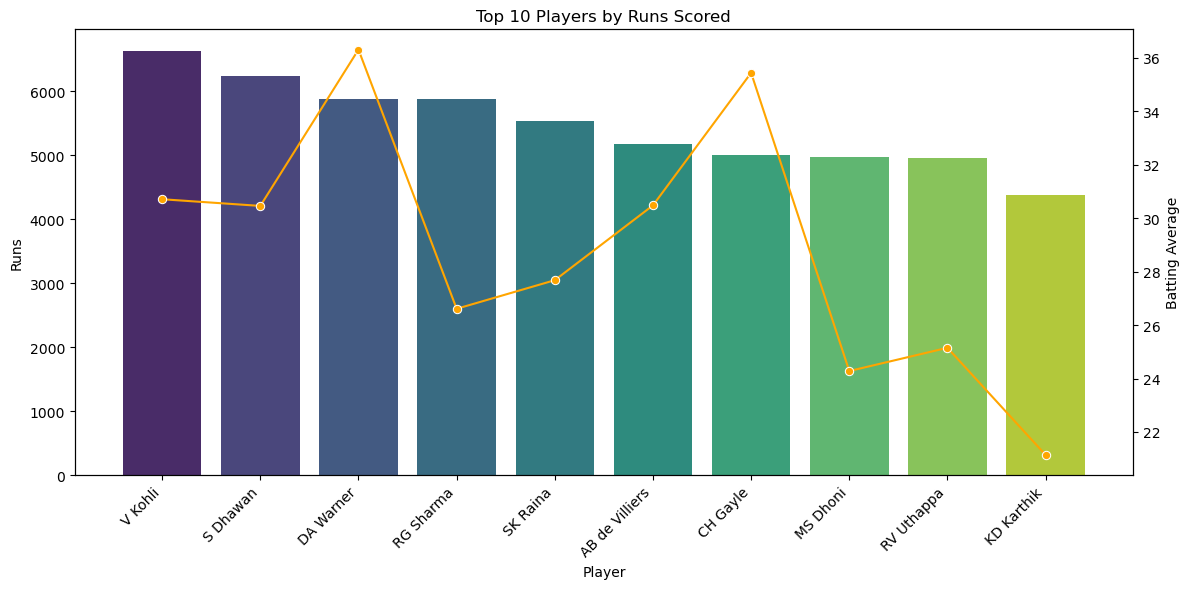

In [8]:
# Sort DataFrame by runs 
top_10_runs = df.sort_values(by='runs', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for runs
sns.barplot(data=top_10_runs, x='player', y='runs', palette='viridis', ax=ax1)

# labels
ax1.set_title('Top 10 Players by Runs Scored')
ax1.set_xlabel('Player')
ax1.set_ylabel('Runs')

# Rotate x-axis labels
ax1.set_xticklabels(top_10_runs['player'], rotation=45, ha='right')

# Twin the axis for the line plot
ax2 = ax1.twinx()

# Line plot for batting average
sns.lineplot(data=top_10_runs, x='player', y='batting_avg', color='orange', marker='o', ax=ax2)

# label for the y-axis
ax2.set_ylabel('Batting Average')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

plt.show()

Plotting top 10 wicket takers among the dataset.

To get a fair view of player's performance. Plot it with the bowling economy of each player.

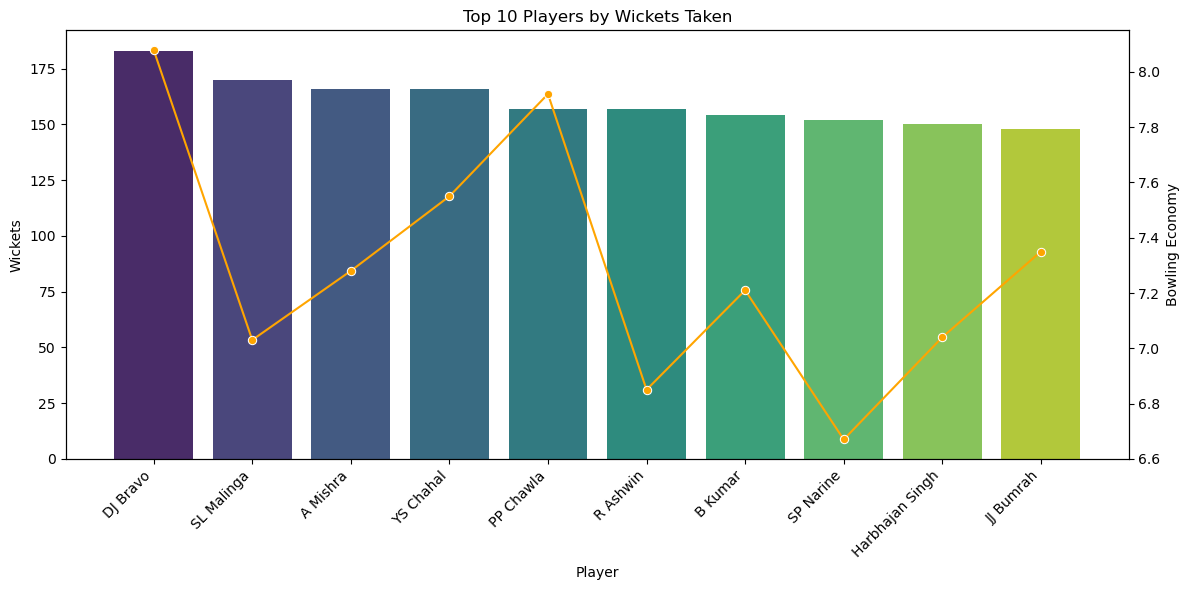

In [9]:
# Sort DataFrame by wickets
top_10_wickets = df.sort_values(by='wickets', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for wickets taken
sns.barplot(data=top_10_wickets, x='player', y='wickets', palette='viridis', ax=ax1)
ax1.set_title('Top 10 Players by Wickets Taken')
ax1.set_xlabel('Player')
ax1.set_ylabel('Wickets')
ax1.set_xticklabels(top_10_wickets['player'], rotation=45, ha='right')

# Twin the axis for the line plot
ax2 = ax1.twinx()

# Line plot for bowling economy
sns.lineplot(data=top_10_wickets, x='player', y='bowling_economy', color='orange', marker='o', ax=ax2)
ax2.set_ylabel('Bowling Economy')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

plt.show()

Plotting top wicket takers and runs scorers among the dataset.

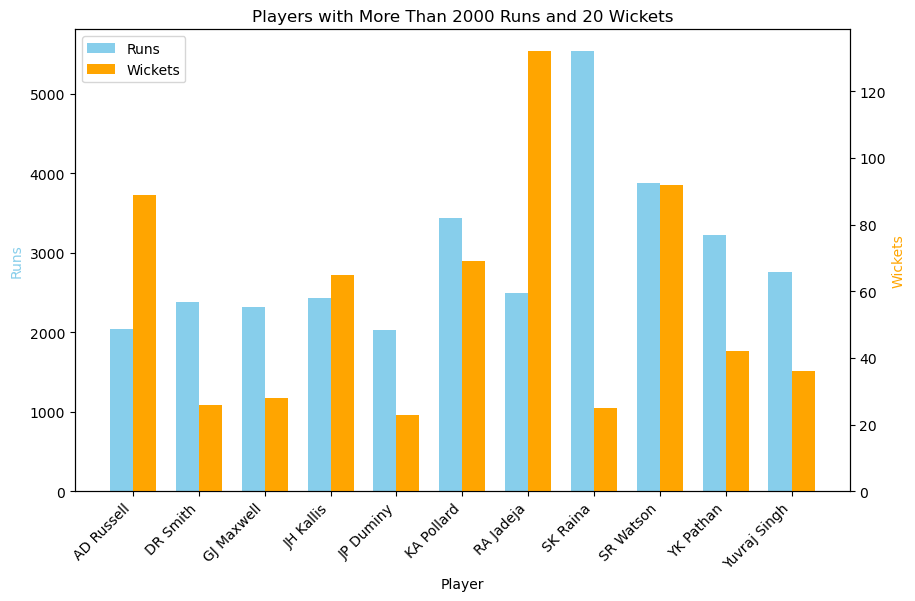

In [10]:
# Filter players with more than 2000 runs and 20 wickets
filtered_players = df[(df['runs'] > 2000) & (df['wickets'] > 20)]


fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(filtered_players))

bar_width = 0.35

# Plotting runs
bar1 = ax.bar(index, filtered_players['runs'], bar_width, color='skyblue', label='Runs')

ax_wickets = ax.twinx()

# Plotting wickets
bar2 = ax_wickets.bar(index + bar_width, filtered_players['wickets'], bar_width, color='orange', label='Wickets')

# Labeling
ax.set_xlabel('Player')
ax.set_ylabel('Runs', color='skyblue')
ax_wickets.set_ylabel('Wickets', color='orange')
ax.set_title('Players with More Than 2000 Runs and 20 Wickets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(filtered_players['player'], rotation=45, ha='right')

# Legend
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax.legend(bars, labels, loc='upper left')

plt.show()

Plotting Top Players with Highest Number of Catches among the dataset.

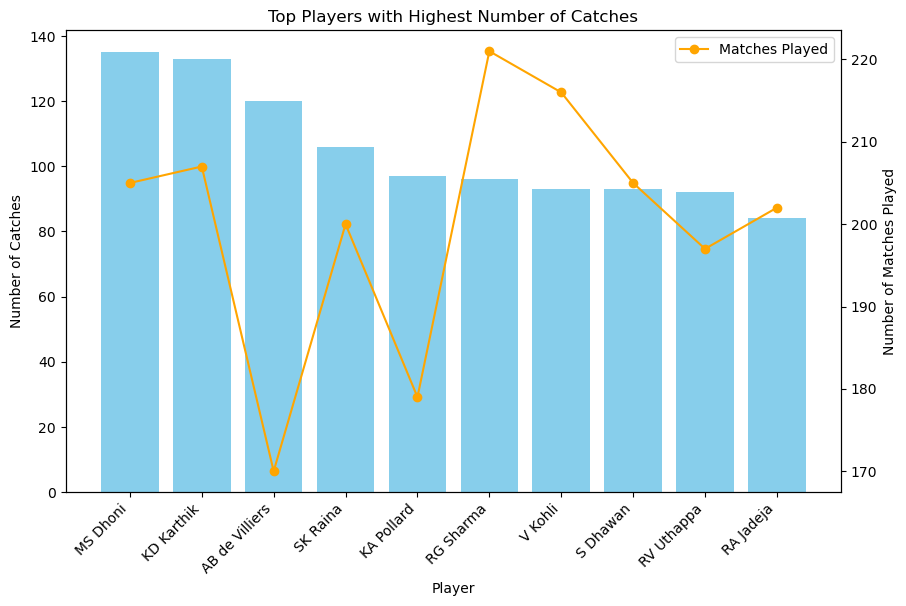

In [11]:
# Sort the dataframe by catches in descending order
top_catch_players = df.sort_values(by='catches', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_catch_players['player'], top_catch_players['catches'], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Number of Catches')
plt.title('Top Players with Highest Number of Catches')
plt.xticks(rotation=45, ha='right')
plt.twinx()
plt.plot(top_catch_players['player'], top_catch_players['matches'], marker='o', color='orange', label='Matches Played')
plt.ylabel('Number of Matches Played')
plt.grid(False)
plt.legend(loc='upper right')
plt.show()

# Checking the Correlation between batting average and batting strike rate.

Ploting histogram for Batting Average

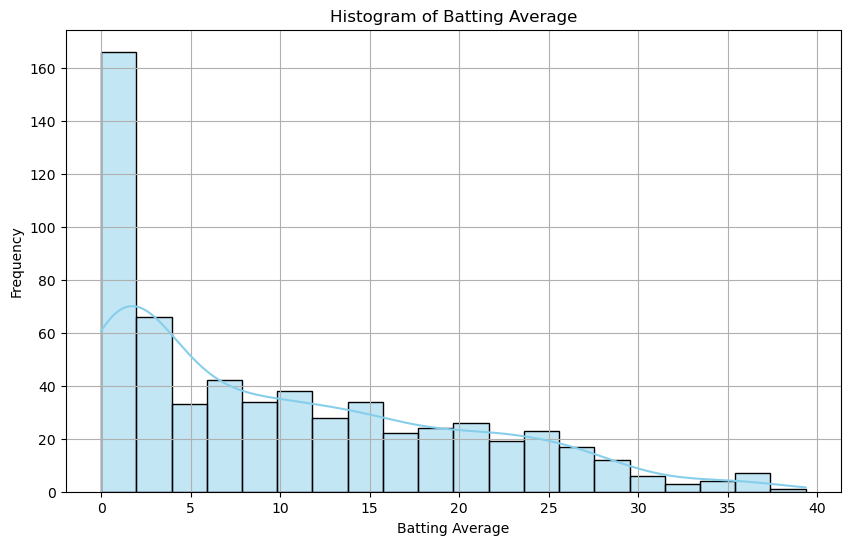

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['batting_avg'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#+ skew

Ploting histogram for batting strike rate

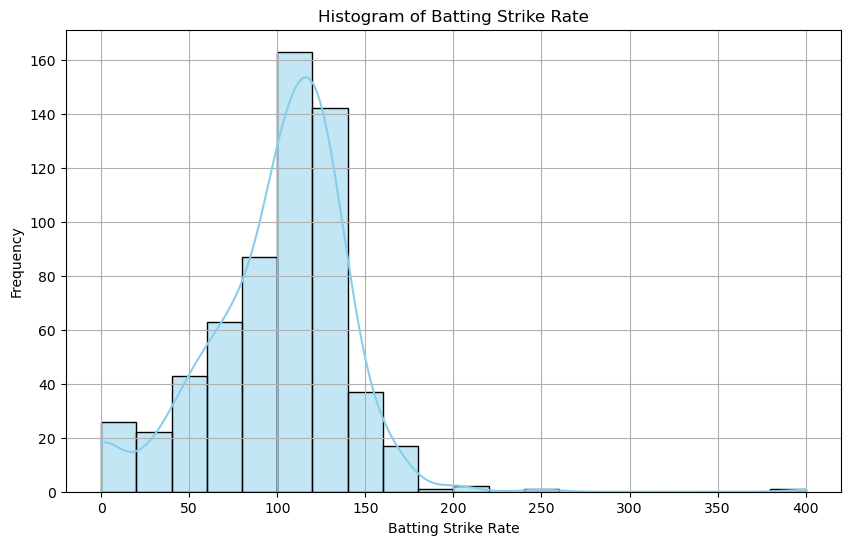

In [61]:
# Plot histogram for batting_strike_rate
plt.figure(figsize=(10, 6))
sns.histplot(df['batting_strike_rate'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of Batting Strike Rate')
plt.xlabel('Batting Strike Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#- skew

Using regplot to show the correlation between batting average and batting strike rate. 

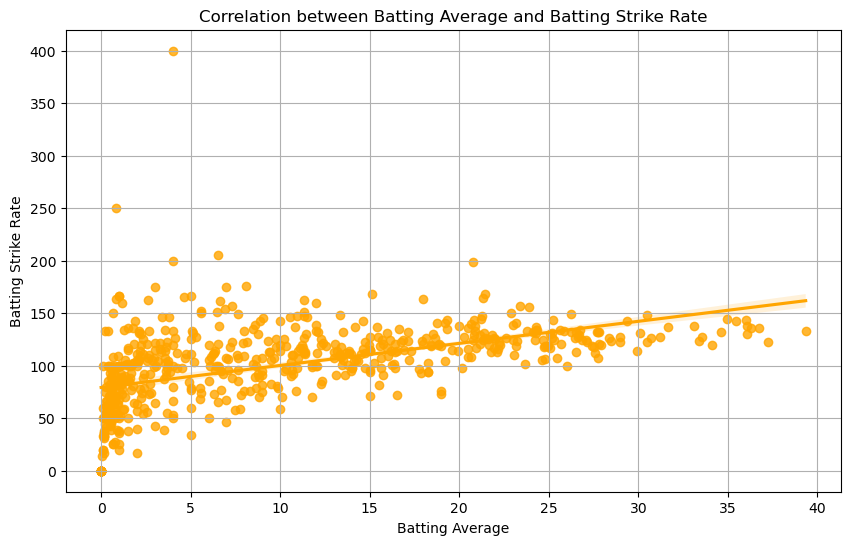

In [62]:
# Plot scatter plot with trend line for batting_avg and batting_strike_rate
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='batting_avg', y='batting_strike_rate', color='orange')
plt.title('Correlation between Batting Average and Batting Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.grid(True)
plt.show()

The above results was a positive correlation. Which means that the players who have a higher batting average tends to have a higher strike rate. 

In [63]:
# correlation between batting_avg and batting_strike_rate
correlation = df['batting_avg'].corr(df['batting_strike_rate'])

print("Correlation between Batting Average and Batting Strike Rate:", correlation)

Correlation between Batting Average and Batting Strike Rate: 0.500891325689456


# Business Question

Find the best 11 players out of this dataset 

Team composition should be

- 2 x Opening Batsmen
- 2 x Middle Order Batsmen
- 1 x Wicket Keeper
- 3 x All Rounders
- 3 x Bowlers

Assumptions 

- All the players in the dataset are available for selection 
- No restriction on number of overseas players in final 11

# Opening Batsmen

We are looking for an ideal opening batsmen with below criteria.

- Batting average > 30
- Batting strike rate > 130
- Matches > 5
- Boundaries percent > 19


In [32]:
# Filter the dataset
ideal_openers = df[(df['batting_avg'] > 30) & 
                   (df['batting_strike_rate'] > 130) & 
                   (df['matches'] > 5) & 
                   (df['boundaries_percent'] > 19)]

print(ideal_openers[['player', 'batting_avg', 'batting_strike_rate', 'matches', 'boundaries_percent']])

             player  batting_avg  batting_strike_rate  matches  \
27   AB de Villiers        30.48               148.58      170   
106         CA Lynn        31.64               136.45       42   
108        CH Gayle        35.44               142.12      141   
152       DP Conway        36.00               143.18        7   
192         HM Amla        36.06               138.04       16   
219      JC Buttler        34.96               144.86       81   
232     JM Bairstow        33.10               138.07       39   
330       ML Hayden        34.59               131.94       32   

     boundaries_percent  
27                19.13  
106               20.33  
108               21.81  
152               19.89  
192               19.38  
219               21.13  
232               20.11  
330               19.67  


# Middle Order Batsmen

Filtering Middle Order Batsmen with the below criteria.

- Batting average > 30
- Batting strike rate <= 130
- Batting strike rate >= 100
- Matches > 10
- Balls Faced / Match > 24

In [28]:
# Filter the dataset based on the criteria
selected_players = df[(df['batting_avg'] > 30) & 
                      (df['batting_strike_rate'] >= 100) & 
                      (df['batting_strike_rate'] <= 130) &
                      (df['matches'] > 10) & 
                      ((df['balls_faced'] / df['matches']) > 24)]

# Display the selected players
print(selected_players[['player', 'batting_avg', 'batting_strike_rate', 'matches', 'balls_faced']])

           player  batting_avg  batting_strike_rate  matches  balls_faced
169  F du Plessis        31.22               127.17      109         2676
288   LMP Simmons        37.21               122.89       29          878
319    MEK Hussey        34.09               119.96       58         1648
426    RD Gaikwad        33.53               127.72       36          945
462      S Dhawan        30.46               122.84      205         5083
569       V Kohli        30.71               125.98      216         5266


# Wicket Keeper

Filtering Wicket keepers with below criteria.

- Stumpings > 8
- Batting Average > 130
- Matches > 15

In [33]:
wicketkeepers = df[(df['stumpings'] > 8) &
                  (df['batting_avg'] > 24) &
                  (df['matches'] > 15)]


print(wicketkeepers[['player', 'stumpings', 'batting_avg', 'matches']])

            player  stumpings  batting_avg  matches
29    AC Gilchrist         16        25.86       80
255  KC Sangakkara          9        24.81       68
339       MS Dhoni         39        24.28      205
404      Q de Kock         15        30.08       92
441        RR Pant         18        29.39       97
452     RV Uthappa         32        25.15      197
519      SV Samson         12        26.51      133


# Allrounders

Filtering Allrounders with below criteria.

- Batting average > 15
- Batting strike rate > 100
- Balls faced > 100
- Wickets > 10
- Balls bowled > 400
- Bowling economy < 10
- Bowling strikerate < 24

In [34]:
allrounders = df[(df['batting_avg'] > 15) & 
                      (df['batting_strike_rate'] > 100) & 
                      (df['balls_faced'] > 100) & 
                      (df['wickets'] > 10) & 
                      (df['balls_bowled'] > 400) & 
                      (df['bowling_economy'] < 10) & 
                      (df['bowling_strike_rate'] < 24)]


print(allrounders[['player', 'batting_avg', 'batting_strike_rate', 'balls_faced', 
                       'wickets', 'balls_bowled' , 'bowling_economy', 'bowling_strike_rate']])

            player  batting_avg  batting_strike_rate  balls_faced  wickets  \
36      AD Russell        21.46               168.23         1212       89   
75   Azhar Mahmood        16.87               124.76          311       29   
159       DR Smith        26.21               132.28         1803       26   
191      HH Pandya        18.78               140.26         1406       50   
251     KA Pollard        19.20               140.46         2447       69   
315   MC Henriques        16.13               124.84          801       42   
331         MM Ali        20.68               139.57          652       24   
336     MP Stoinis        15.97               131.61          813       34   
337       MR Marsh        16.41               120.81          394       24   
511      SR Watson        26.76               134.16         2892       92   

     balls_bowled  bowling_economy  bowling_strike_rate  
36           1484             8.95                16.67  
75            552        

# Bowlers

Filtering bowlers with below criteria.


- Balls bowled > 300
- Bowling economy < 8
- Bowling strike rate < 20
- Bowling average < 23
- Wickets > 20

In [40]:
best_bowlers = df[(df['balls_bowled'] > 300) &
                  (df['bowling_economy'] < 8) &
                  (df['bowling_strike_rate'] < 20) &
                  (df['bowling_avg'] < 23) &
                  (df['wickets'] > 20)]

print(best_bowlers[['player', 'balls_bowled', 'bowling_economy', 'bowling_strike_rate', 'bowling_avg', 'wickets']])

           player  balls_bowled  bowling_economy  bowling_strike_rate  \
14        A Singh           486             7.89                17.36   
134  DE Bollinger           600             7.16                16.22   
207   Imran Tahir          1340             7.74                16.34   
218     JC Archer           858             7.05                18.65   
313      MA Starc           612             7.11                18.00   
320   MF Maharoof           441             7.24                16.33   
337      MR Marsh           407             7.78                16.96   
401  PWH de Silva           382             7.84                14.69   
454   Rashid Khan          2232             6.48                19.93   
496    SL Malinga          2974             7.03                17.49   
598     YS Chahal          2940             7.55                17.71   

     bowling_avg  wickets  
14         22.82       28  
134        19.35       37  
207        21.09       82  
218        

# Final 11

Sort with proper logic and select best players from each category 

In [50]:
# Opening Batsmen
ideal_openers = df[(df['batting_avg'] > 30) & 
                   (df['batting_strike_rate'] > 130) & 
                   (df['matches'] > 5) & 
                   (df['boundaries_percent'] > 19)]

# Sort
top_openers = ideal_openers.sort_values(by=['batting_strike_rate'], ascending=False).head(2)

# Display the top 2 
print('1. Opening Batsman')
print(top_openers[['player']])





# Middle Order Batsmen
selected_players = df[(df['batting_avg'] > 30) & 
                      (df['batting_strike_rate'] >= 100) & 
                      (df['batting_strike_rate'] <= 130) &
                      (df['matches'] > 10) & 
                      ((df['balls_faced'] / df['matches']) > 24)]
# Sort 
middle_order = selected_players.sort_values(by=['matches'], ascending=False).head(2)

# Display the selected players
print('-------------------')
print('2. Middle Order Batsman')
print(middle_order[['player']])





#wicketkeepers
good_wicketkeepers = df[(df['stumpings'] > 8) &
                  (df['batting_avg'] > 24) &
                  (df['matches'] > 15)]

Wicket_Keeper = good_wicketkeepers.sort_values(by=['batting_avg'], ascending=False).head(1)

print('-------------------')
print('3. Wicket Keeper')
print(Wicket_Keeper[['player']])




# allrounders
best_allrounders = df[(df['batting_avg'] > 15) & 
                      (df['batting_strike_rate'] > 100) & 
                      (df['balls_faced'] > 100) & 
                      (df['wickets'] > 10) & 
                      (df['balls_bowled'] > 400) & 
                      (df['bowling_economy'] < 10) & 
                      (df['bowling_strike_rate'] < 24)]

All_Rounders = best_allrounders.sort_values(by=['wickets'], ascending=False).head(3)

print('-------------------')
print('4. All Rounders')
print(All_Rounders[['player']])




#bowlers

best_bowlers = df[(df['balls_bowled'] > 300) &
                  (df['bowling_economy'] < 8) &
                  (df['bowling_strike_rate'] < 20) &
                  (df['bowling_avg'] < 23) &
                  (df['wickets'] > 20)]

Bowlers = best_bowlers.sort_values(by=['wickets'], ascending=False).head(3)

print('-------------------')
print('5. Bowlers')
print(Bowlers[['player']])

1. Opening Batsman
             player
27   AB de Villiers
219      JC Buttler
-------------------
2. Middle Order Batsman
       player
569   V Kohli
462  S Dhawan
-------------------
3. Wicket Keeper
        player
404  Q de Kock
-------------------
4. All Rounders
         player
511   SR Watson
36   AD Russell
251  KA Pollard
-------------------
5. Bowlers
          player
496   SL Malinga
598    YS Chahal
454  Rashid Khan


# Key findings based on the analysis:

<b>1. Top Performers Identification:</b>
Identified the top performers in terms of total runs scored, wickets taken, catches taken and  Allround performance shedding light on the most influential players in the league.


<b>2. Performance Correlation Analysis:</b>
Conducted a analysis to understand the relationship between batting average and batting strike rate. Discovered a positive correlation between batting average and batting strike rate, indicating that players who score more runs tend to do so at a faster pace.


<b>3. Identification of Optimal Team Composition:</b>
Utilized performance metrics to find the best possible team lineup comprising 11 players. Leveraged data from key metrics to formulate a balanced team. 

# Future improvements


<b>1. Collect Current Auction Prices:</b> Incorporating data on each player's current auction price would enhance team selection strategies by considering their market value and aligning it with the team's budgetary constraints.


<b>2. Include Player Age:</b> Introducing a column for player age would facilitate the selection of athletes at their peak physical fitness and performance, aiding in crafting a competitive team.


<b>3. Yearly Performance Metrics:</b> Creating columns for runs scored, wickets taken, and matches played per year would provide insights into a player's performance trajectory over time. This granularity enables the evaluation of current form and consistency, aiding in informed decision-making during player selection.


<b>4. International Representation:</b> Adding a column indicating each player's international representation would enable teams to strategize around player availability during the IPL season, optimizing team composition and reducing conflicts with international commitments.


<b>5. Local vs. Foreign Players:</b> Introducing a column categorizing players as local or foreign allows teams to adhere to league regulations mandating a maximum of four foreign players per team, facilitating compliance and team structuring.


<b>6. Player Categories:</b> Incorporating a column to distinguish player categories, such as batsmen, bowlers, or all-rounders, provides valuable insights into player specialties and roles within the team, aiding in evaluating the data with ease. 